In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline

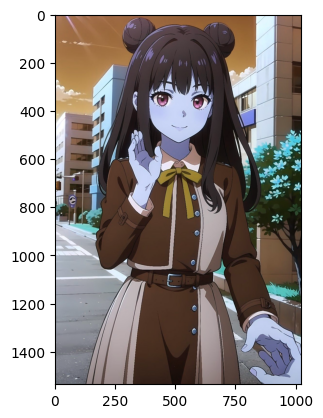

In [26]:
img = cv2.imread("../test_img/Takina.jpeg")
plt.imshow(img)

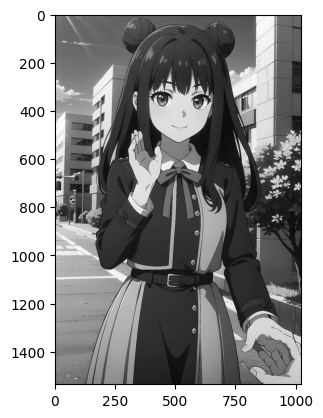

In [27]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

In [28]:
face_casade = cv2.CascadeClassifier("../opencv/lbpcascade_animeface.xml")
eye_casade = cv2.CascadeClassifier("../opencv/anime-eyes-cascade.xml")
faces = face_casade.detectMultiScale(gray,1.3,5)
faces

[ERROR:0@2133.937] global persistence.cpp:512 open Can't open file: '../opencv/anime-eyes-cascade.xml' in read mode


array([[307, 192, 415, 415]], dtype=int32)

In [29]:
(x,y,w,h) = faces[0]
x,y,w,h

(307, 192, 415, 415)

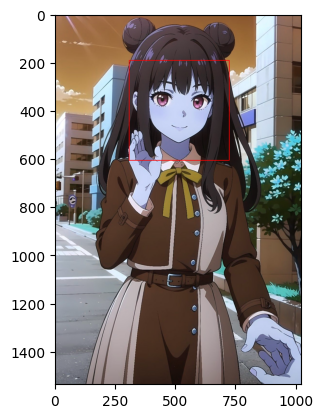

In [30]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [32]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_casade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_casade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [33]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_casade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


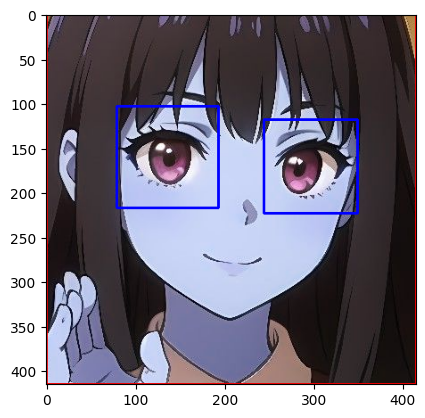

In [ ]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray")

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_casade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_casade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
path_to_data = "../dataset/"
path_to_cr_data = "../dataset/cropped/"
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
print(img_dirs)

['../dataset/Takina_Inoue', '../dataset/Shibuya_rin']


In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
waifu_file_names_dict = {}

for img_dir in img_dirs:
    waifu_name = os.path.basename(img_dir)
    print(f"Waifu name: {waifu_name}")
    waifu_file_names_dict[waifu_name] = []
    
    cropped_folder = os.path.join(path_to_cr_data, waifu_name)
    os.makedirs(cropped_folder, exist_ok=True)
    print("Generating cropped images in folder:", cropped_folder)
    
    for count, entry in enumerate(os.scandir(img_dir), 1):
        if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_file_name = f"{waifu_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, roi_color)
                waifu_file_names_dict[waifu_name].append(cropped_file_path)


Waifu name: Takina_Inoue
Generating cropped images in folder: ../dataset/cropped/Takina_Inoue


NameError: name 'get_cropped_image_if_2_eyes' is not defined